# CUARTO EXPERIMENTO

In [2]:
import os #Nos permite realizar operaciones como crear carpeta, listas contenidos etc. 
import matplotlib.pyplot as plt #Permitirá visualizar las imágenes
from keras.models import Sequential #Keras para procesamiento de imagen
from keras.utils import to_categorical #Para categorizar variables
from tensorflow.keras import layers #Importación de librerias
import pathlib #manipular rutas de sistemas de archivos
import numpy as np # manejo de datos extremadamente rápido. 
import tensorflow as TF #crear gráficos de flujo de datos,
from sklearn import preprocessing  #proporciona varias funciones de utilidad comunes
#para realizar operaciones simples con imágenes como: Abrir y guardar imágenes.
#Dibujar formas simples en imágenes. Escribir en imágenes.
import cv2
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #establecer variables de entorno
import shutil #Mueve de forma recursiva un archivo o directorio
import glob #devuelve una lista con las entradas 
#Pandas nos permite obtener columnas o filas de nuestros datos de forma muy fácil e intuitiva.
import pandas as pd
import seaborn as sn #visualización de datos para Python
#Procesamiento de imagenes
from tensorflow.keras.utils import img_to_array,  array_to_img, img_to_array, load_img 
#abrir, manipular y guardar muchos formatos de archivo de imagen diferentes.
from  PIL  import Image
#Romver el fondo
from rembg import remove
# procesamiento de imagen
from sklearn.preprocessing import MinMaxScaler
import h5py
from time import sleep

In [3]:
fpath = 'C:/Users/JHONZ/Desktop/V1-ProU3/Fpng' #Nos dirigimos a la ruta, donde están las imagenes con el fondo ya removido
random_seed = 9 # inicializamos el generador de números aleatorios en 9 

categories = os.listdir(fpath) #leemos toda la carpeta
print("Lista de las categorias = ",categories,"\n\nNo. de categorias = ", len(categories)) #Printiamos el numero de categorias

Lista de las categorias =  ['JhonZambrano', 'JoanCevallos', 'LuisOlalla', 'RaymonDavila', 'SelenaRivas'] 

No. de categorias =  5


In [4]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  150 
No. of labels loaded =  150
<class 'list'> <class 'list'>


In [5]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (150, 192, 192, 3) 
Labels shape =  (150,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


**ENTRENAR EL MODELO**


In [6]:
#1-Reorganización de datos

#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
print("'n' antes del intercambio = ",n)

#todos los valores igualmente espaciados en la lista 'n'
np.random.seed(random_seed) #La función random. seed inicializa el generador de números aleatorios.
#La función shuffle() 'mezcla' o 
#cambia aleatoriamente el orden de los elementos de una lista antes de realizar la selección de alguno de ellos
np.random.shuffle(n)
print("\n'n' despues del intercambio = ",n)

'n' antes del intercambio =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]

'n' despues del intercambio =  [135  90 145 147  60  37  26   3  75   9  25  73  98  94  39  81  31  55
 101  47  28  27 111  20 118  89  43 144   8 137 112 138  23  67  79  82
  76  45 109   7  17 100  86  44 103  68   6  69  35 130  70  51  10  53
 133 136 110 140  80  21 134  38   2  84 116  11  57  78 122  96  97  36
  32 148  88  14 107  83 106  95  48 

In [7]:
#2-paso en el barajado de datos

##imágenes aleatorias y datos de etiquetas correspondientes en ambas listas
images = images[n]
labels = labels[n]

print("Antes del intercambio = ",images.shape,"\nDespues del intercambio = ",labels.shape)

Antes del intercambio =  (150, 192, 192, 3) 
Despues del intercambio =  (150,)


In [8]:
images = images.astype(np.float32) #Convertimos las imagenes a tipo flotante
labels = labels.astype(np.int32) #Las etiquetas en tipo de int
images = images/255 #Normalizamos
print("Forma de las imágenes después de la normalización = ",images.shape) #Comprabamos que todas tengas las mismas etquetas

Forma de las imágenes después de la normalización =  (150, 192, 192, 3)


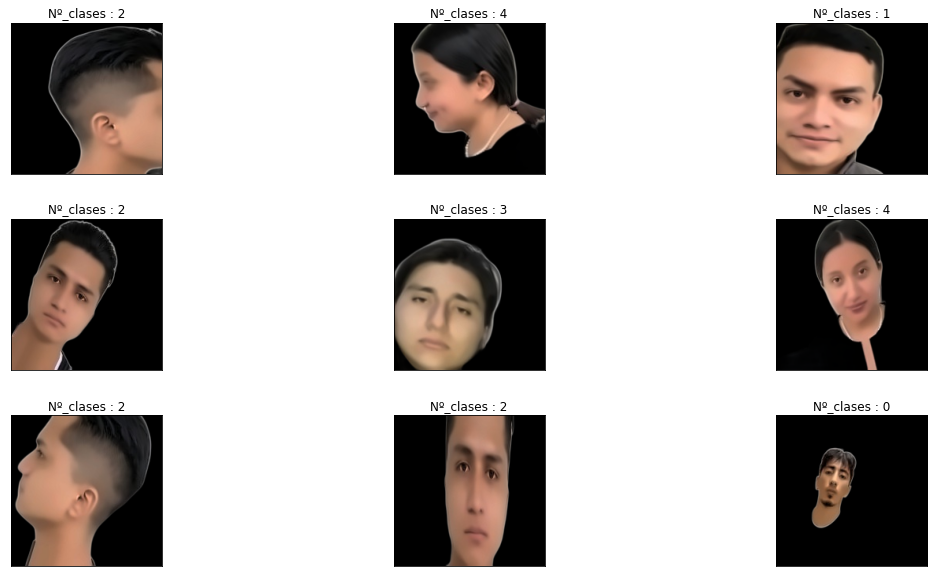

In [9]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Nº_clases : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
display_rand_images(images, labels)
    


In [10]:
#DIVIDIR EL DATASET

In [11]:
from sklearn.model_selection import train_test_split #permite dividir un dataset en dos bloques,

train_ds, test_ds, train_labels, test_labels =train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("train_ds  = ",train_ds.shape) #Mostramos el valor de entrenar
print("train_labels = ",train_labels.shape) #Mostramos las etiquetas de entramientos
print("\ntest_ds = ",test_ds.shape) #Los test de la imágen
print("test_labels= ",test_labels.shape) #Los test de labels

train_ds  =  (120, 192, 192, 3)
train_labels =  (120,)

test_ds =  (30, 192, 192, 3)
test_labels=  (30,)


In [12]:
import tensorflow as tf
train_ds = tf.image.resize(train_ds, (227, 227))
test_ds = tf.image.resize(test_ds, (227, 227))

# DEFINE ALEX NET MODELO

In [13]:
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [16]:
#Conv2D = Aplica una convolución 2D sobre una señal de entrada compuesta por varios planos de entrada
#MaxPooling2D = tipo de capa que usa una red convolucional para reconocimiento de imágenes 
#Dense = Las capas Dense son la capas de cálculo de que conectan cada neurona en una capa con todas las salidas de la capa anterior.
#Flatten = La función Flatten agrega argumentos en el orden en que se incluyen en la fórmula.
#Dropout = El dropout se ha utilizado desde su concepción como un método de regularización de los modelos.

model=Sequential() #Instancias la clase Sequential
#1 capa de convulución
#al modelo se le agrega una para de 2d, con filtro de 96 lotes, activando la función relu, tamaño de la foto
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))
#1 max pool capa
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

#2 capa de convolución
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
# model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
model.add(Conv2D(filters=384,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
#2 max pool capa
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())
#6 capa extra Convulución
# model.add(Conv2D(filters=96,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#6max poll  capa y normalización

#3 capa de convulución
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#4 capa de convulución
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#5 capa de convulución
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
#3 max pool capa
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())

#1 capa densa
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())

#2 capa densa
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())
#2 capa densa
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())
#3
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())
#4
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())

#3 capa densa
model.add(Dense(1000,activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())

#capa de salida
model.add(Dense(20,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_16 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 conv2d_13 (Conv2D)          (None, 19, 19, 384)       2457984   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 9, 9, 384)       

In [17]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

**Para el cuarto experimento, se le aumento el número de capas y las épocas en 80**

In [18]:
%%time 
model.fit(train_ds, train_labels,  epochs=80) 

Epoch 1/80
4/4 [==============================] - 21s 4s/step - loss: 3.9042 - accuracy: 0.0583
Epoch 2/80
4/4 [==============================] - 17s 4s/step - loss: 2.8501 - accuracy: 0.3167
Epoch 3/80
4/4 [==============================] - 18s 4s/step - loss: 2.1716 - accuracy: 0.5083
Epoch 4/80
4/4 [==============================] - 16s 4s/step - loss: 2.1843 - accuracy: 0.5417
Epoch 5/80
4/4 [==============================] - 16s 4s/step - loss: 2.0012 - accuracy: 0.5500
Epoch 6/80
4/4 [==============================] - 16s 4s/step - loss: 1.6475 - accuracy: 0.6333
Epoch 7/80
4/4 [==============================] - 15s 4s/step - loss: 1.2613 - accuracy: 0.6667
Epoch 8/80
4/4 [==============================] - 16s 4s/step - loss: 1.1848 - accuracy: 0.7083
Epoch 9/80
4/4 [==============================] - 16s 4s/step - loss: 0.7577 - accuracy: 0.7833
Epoch 10/80
4/4 [==============================] - 17s 4s/step - loss: 0.7542 - accuracy: 0.7500
Epoch 11/80
4/4 [======================

**La precisión del modelo es no es mala**

In [19]:
loss, accuracy = model.evaluate(test_ds, test_labels) #Perdida y precisión, en la imágen de test y las etquetas de test
print(loss,accuracy) #Mostramos la perdidad y la precisión

1/1 [==============================] - 2s 2s/step - loss: 13.4821 - accuracy: 0.3333
13.482102394104004 0.3333333432674408


# Predecir

In [20]:
pred = model.predict(test_ds)

pred.shape


1/1 [==============================] - 1s 1s/step


(30, 20)

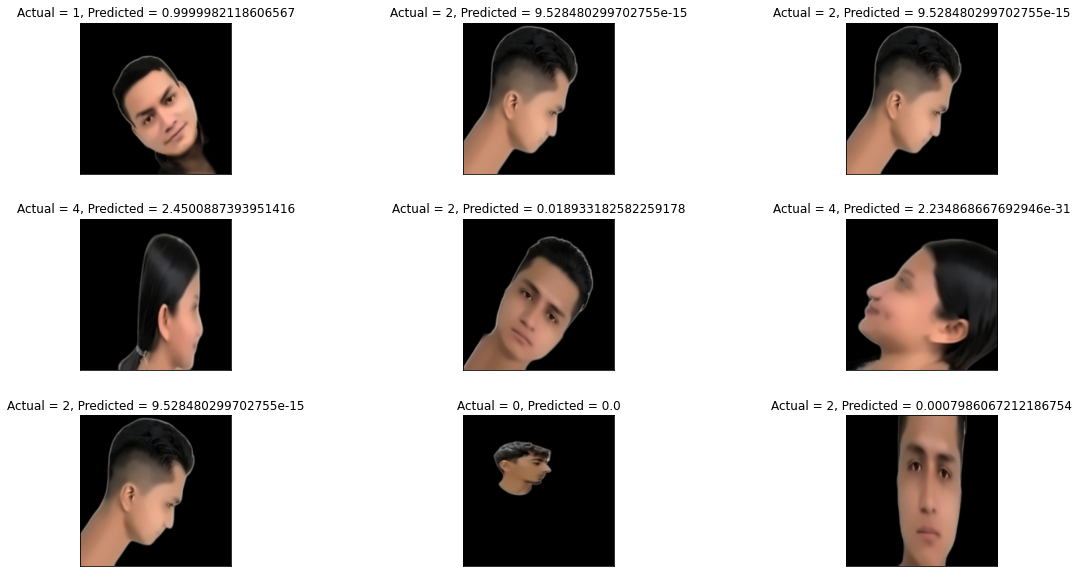

In [21]:
# Definir el tamaño de las figuras
plt.figure(1 , figsize = (19 , 10))
# Definimos un contador
n = 0 
# Bucle para mostrar las imagenes
for i in range(9):
    # Incrementamos el contador
    n += 1 
    # Obtenemos una imagen aleatoria
    r = np.random.randint( 0, test_ds.shape[0], 1)
    # Establecemos la forma de presentar las imagenes
    plt.subplot(3 , 3 , n)
    # Ajustamos la forma de mostrar las imagenes
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    # obtenemos la imagen actual para mostrar
    plt.imshow(test_ds[r[0]])
    # Asignamos las etiquetas
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    # Establecemos la medida x, y
    plt.xticks([]) , plt.yticks([])

# Mostramos la gráfica
plt.show()

Algunas clases predice bien, sim enbargo otras no